In [1]:
from datasets import Dataset, DatasetDict
from tqdm import tqdm
import pandas as pd
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt

import wandb
api = wandb.Api()

/home/hua2bv/miniconda3/envs/unlearning/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
project_name = "kyledevinobrien1/Composable_Interventions"
runs = api.runs(project_name)
all_runs_frame = None
for run in tqdm(runs):
    if run.state != "finished":
        continue

    skip_tags = ["test", "search", "hparam_search", "none"]
    should_skip = False
    for tag in skip_tags:
        if tag in run.config["tag"].lower():
            should_skip = True
            break
    
    if should_skip:
        continue

    try:
        config_frame = pd.DataFrame([run.config])
        summary_frame = pd.DataFrame([run.summary_metrics])
        combined_frame = pd.concat([config_frame, summary_frame], axis=1)
        if all_runs_frame is None:
            all_runs_frame = combined_frame
        else:
            all_runs_frame = pd.concat([all_runs_frame, combined_frame])
    except:
        print(f"Failed to load run {run.id}")
        continue

all_runs_frame = all_runs_frame.sort_values("_timestamp", ascending=False)
for column in all_runs_frame.columns:
    all_runs_frame[column] = all_runs_frame[column].apply(lambda x: str(x) if isinstance(x, dict) or isinstance(x, list) else x)

all_runs_frame

100%|██████████| 6883/6883 [00:24<00:00, 275.86it/s]


,lr,sym,tag,edit,save,seed,dtype,wandb,wbits,device,...,mom2_dtype,mom2_dataset,v_loss_layer,mom2_n_samples,v_weight_decay,layer_selection,mom2_adjustment,v_num_grad_steps,clamp_norm_factor,mom2_update_weight
0,0.00005,True,ft-to-Wanda0.65%,ft,out/,0,torch.bfloat16,online,4.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.00005,True,ft-to-Wanda0.45%,ft,out/,0,torch.bfloat16,online,4.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,True,awq2bit-rmu,none,out/,0,torch.float16,online,2.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,True,Compress_SparseGPT0.25%,none,out/,0,torch.bfloat16,online,4.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.00005,True,ft-to-Wanda0.25%,ft,out/,0,torch.bfloat16,online,4.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,True,Compress_Wanda0.65%,none,out/,0,torch.bfloat16,online,4.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,True,Compress_Wanda0.25%,none,out/,0,torch.bfloat16,online,4.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,True,Compress_Wanda0.45%,none,out/,0,torch.bfloat16,online,4.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.00005,NaN,ft_Edit,ft,out/,42,torch.bfloat16,online,16.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,True,Compress_SparseGPT0.45%,none,out/,0,torch.bfloat16,online,4.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Drop duplicate experiments, keep the most recent
all_runs_frame = all_runs_frame.drop_duplicates(subset=[col for col in all_runs_frame.columns if col not in ["tag", "Metrics"] and not col.startswith("_")])
all_runs_frame

,lr,sym,tag,edit,save,seed,dtype,wandb,wbits,device,...,mom2_dtype,mom2_dataset,v_loss_layer,mom2_n_samples,v_weight_decay,layer_selection,mom2_adjustment,v_num_grad_steps,clamp_norm_factor,mom2_update_weight
0,0.00005,True,ft-to-Wanda0.65%,ft,out/,0,torch.bfloat16,online,4.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.00005,True,ft-to-Wanda0.45%,ft,out/,0,torch.bfloat16,online,4.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,True,awq2bit-rmu,none,out/,0,torch.float16,online,2.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,True,Compress_SparseGPT0.25%,none,out/,0,torch.bfloat16,online,4.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.00005,True,ft-to-Wanda0.25%,ft,out/,0,torch.bfloat16,online,4.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,True,Compress_Wanda0.65%,none,out/,0,torch.bfloat16,online,4.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,True,Compress_Wanda0.25%,none,out/,0,torch.bfloat16,online,4.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,True,Compress_Wanda0.45%,none,out/,0,torch.bfloat16,online,4.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.00005,NaN,ft_Edit,ft,out/,42,torch.bfloat16,online,16.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,True,Compress_SparseGPT0.45%,none,out/,0,torch.bfloat16,online,4.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# ["lr", "tag", "edit", "rank", "save", "seed", "dtype", "wandb", "device", "method", "rmu_lr", "dataset", "unlearn", "alg_name", "compress", "edit_set", "rmu_seed", "ckpt_path", "kl_factor", "load_ckpt", "lora_type", "num_steps", "rmu_alpha", "save_ckpt", "stats_dir", "batch_size", "lora_alpha", "max_length", "model_name", "save_model", "compression", "rmu_max_len", "rmu_min_len", "edit_dataset", "lora_dropout", "rmu_layer_id", "weight_decay", "interventions", "rmu_layer_ids", "rmu_param_ids", "eval_zero_shot", "model_parallel", "rmu_batch_size", "sparsity_ratio", "target_modules", "unlearn_method", "norm_constraint", "number_of_edits", "rmu_forget_corpora", "rmu_retain_corpora", "compression_dataset", "rmu_max_num_batches", "rmu_steering_coeffs", "PPL edits", "wmdp_cyber", "wmdp_bio accuracy", "mmlu stderr", "Local recall", "wmdp_cyber accuracy", "Success recall", "FLOPs", "Locality", "wmdp_bio", "mmlu accuracy", "PPl edits unmasked", "Generalization recall", "Metrics", "_step", "Average bits", "mmlu", "_wandb", "_runtime", "Rewrite accuracy", "PPL", "Latency", "PPl QA", "Generalization", "wmdp_bio stderr", "wmdp_cyber stderr", "_timestamp", "ln_f_module", "lm_head_module", "mlp_module_tmp", "attn_module_tmp", "layer_module_tmp", "rewrite_module_tmp", "objective_optimization", "sym", "wbits", "nearest", "new_eval", "nsamples", "percdamp", "act_order", "groupsize", "zero_point", "use_variant", "prune_method", "sparsity_type", "static_groups", "true_sequential"]

/tmp/ipykernel_240215/2978898783.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  wanda_then_rmu_frame["plot_tag"] = "Wanda->RMU"


,lr,sym,tag,edit,save,seed,dtype,wandb,wbits,device,...,mom2_dataset,v_loss_layer,mom2_n_samples,v_weight_decay,layer_selection,mom2_adjustment,v_num_grad_steps,clamp_norm_factor,mom2_update_weight,plot_tag


/tmp/ipykernel_240215/2978898783.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rmu_then_wanda_frame["plot_tag"] = "RMU->Wanda"


,lr,sym,tag,edit,save,seed,dtype,wandb,wbits,device,...,mom2_dataset,v_loss_layer,mom2_n_samples,v_weight_decay,layer_selection,mom2_adjustment,v_num_grad_steps,clamp_norm_factor,mom2_update_weight,plot_tag


<Axes: xlabel='sparsity_ratio', ylabel='mmlu accuracy'>

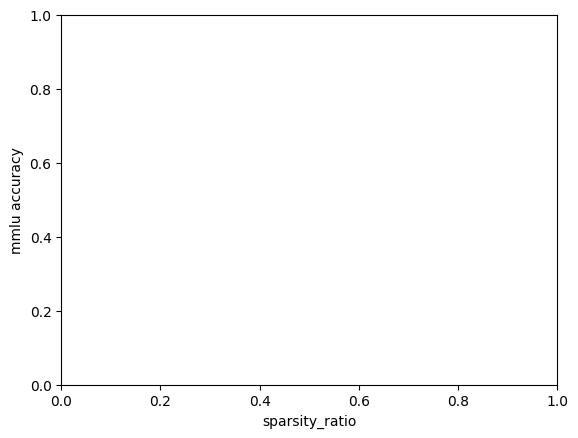

In [5]:
wanda_then_rmu_frame = all_runs_frame[(all_runs_frame["tag"].str.contains("wanda")) & all_runs_frame["tag"].str.contains("-rmu")]
wanda_then_rmu_frame["plot_tag"] = "Wanda->RMU"
display(wanda_then_rmu_frame)

rmu_then_wanda_frame = all_runs_frame[(all_runs_frame["tag"].str.contains("wanda")) & all_runs_frame["tag"].str.contains("rmu-")]
rmu_then_wanda_frame["plot_tag"] = "RMU->Wanda"
display(rmu_then_wanda_frame)

# create a line plot of the two where the x axis is sparsity and the y axis is accuracy
fig, ax = plt.subplots()
sns.lineplot(data=wanda_then_rmu_frame, x="sparsity_ratio", y="mmlu accuracy", hue="plot_tag", ax=ax)
sns.lineplot(data=rmu_then_wanda_frame, x="sparsity_ratio", y="mmlu accuracy", hue="plot_tag", ax=ax)

